In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [13]:
# Read data into pandas dataframes.

data_xlsx = pd.ExcelFile('pain_data_main.xlsx')
everyone_df = pd.read_excel(data_xlsx, 'Surgical Registry EVERYONE')
ecap_df = pd.read_excel(data_xlsx, 'ECap')
calc_df = pd.read_excel(data_xlsx, 'Calculation Sheet')
interim_morph_df = pd.read_excel(data_xlsx, 'Interim Analysis Morph Equiv')
mean_pain_df = pd.read_excel(data_xlsx, 'Interim Analysis Mean Pain ')
max_pain_df = pd.read_excel(data_xlsx, 'Interim Analysis Max Pain  ')
vas_scores_df = pd.read_excel(data_xlsx, 'Interim Analysis VAS Scores')

all_df_list = [everyone_df, ecap_df, calc_df, interim_morph_df, mean_pain_df, max_pain_df, vas_scores_df]

In [20]:
# Examine dimensions of all the loaded data tables.

def print_shape(df):
    print(df.shape)

for df in all_df_list:
    print_shape(df)

(70, 116)
(100, 894)
(70, 495)
(43, 17)
(43, 17)
(44, 80)
(64, 80)


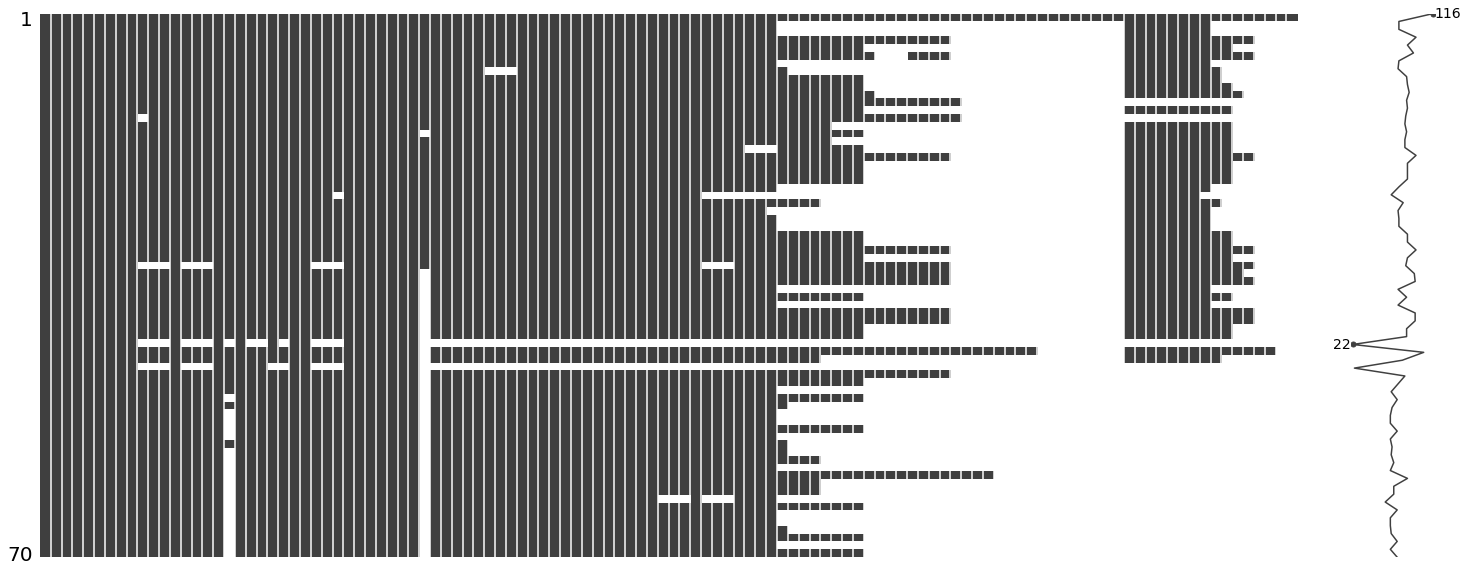

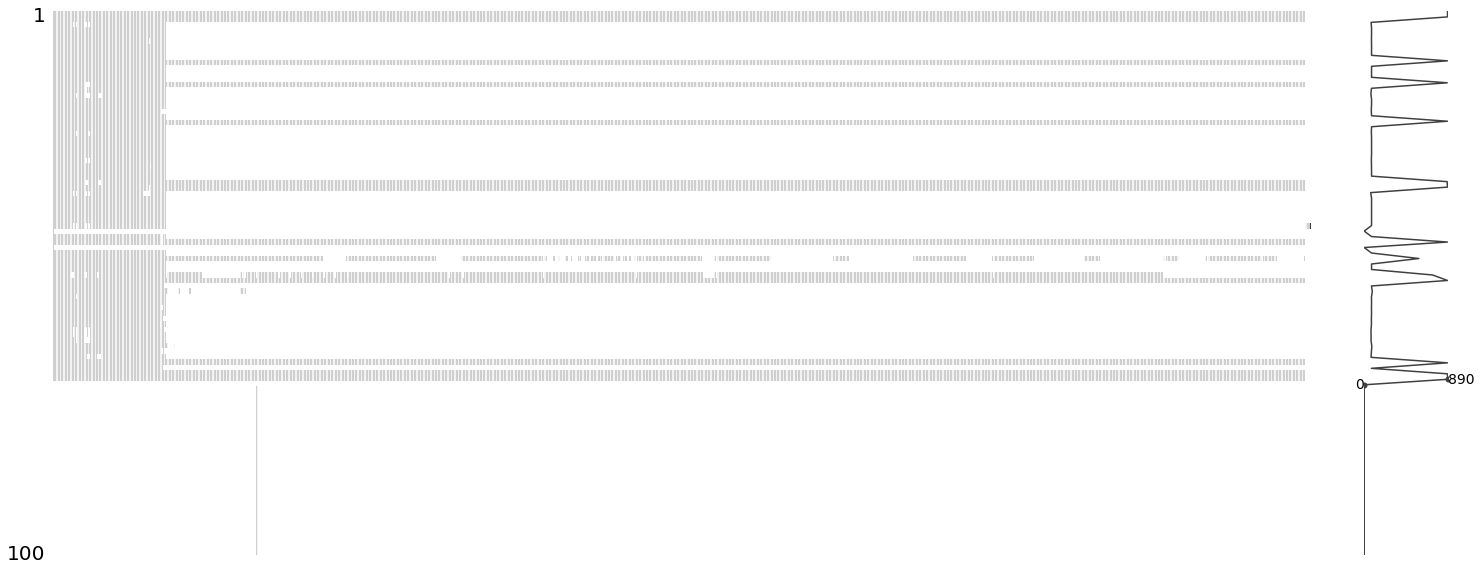

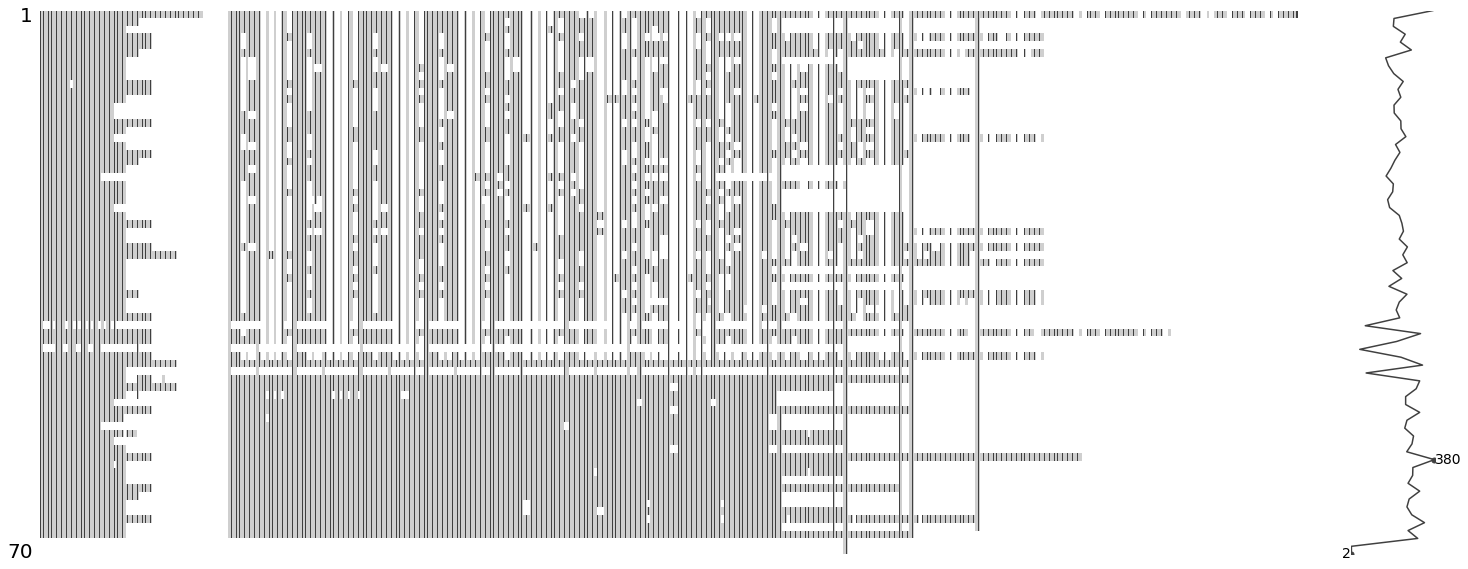

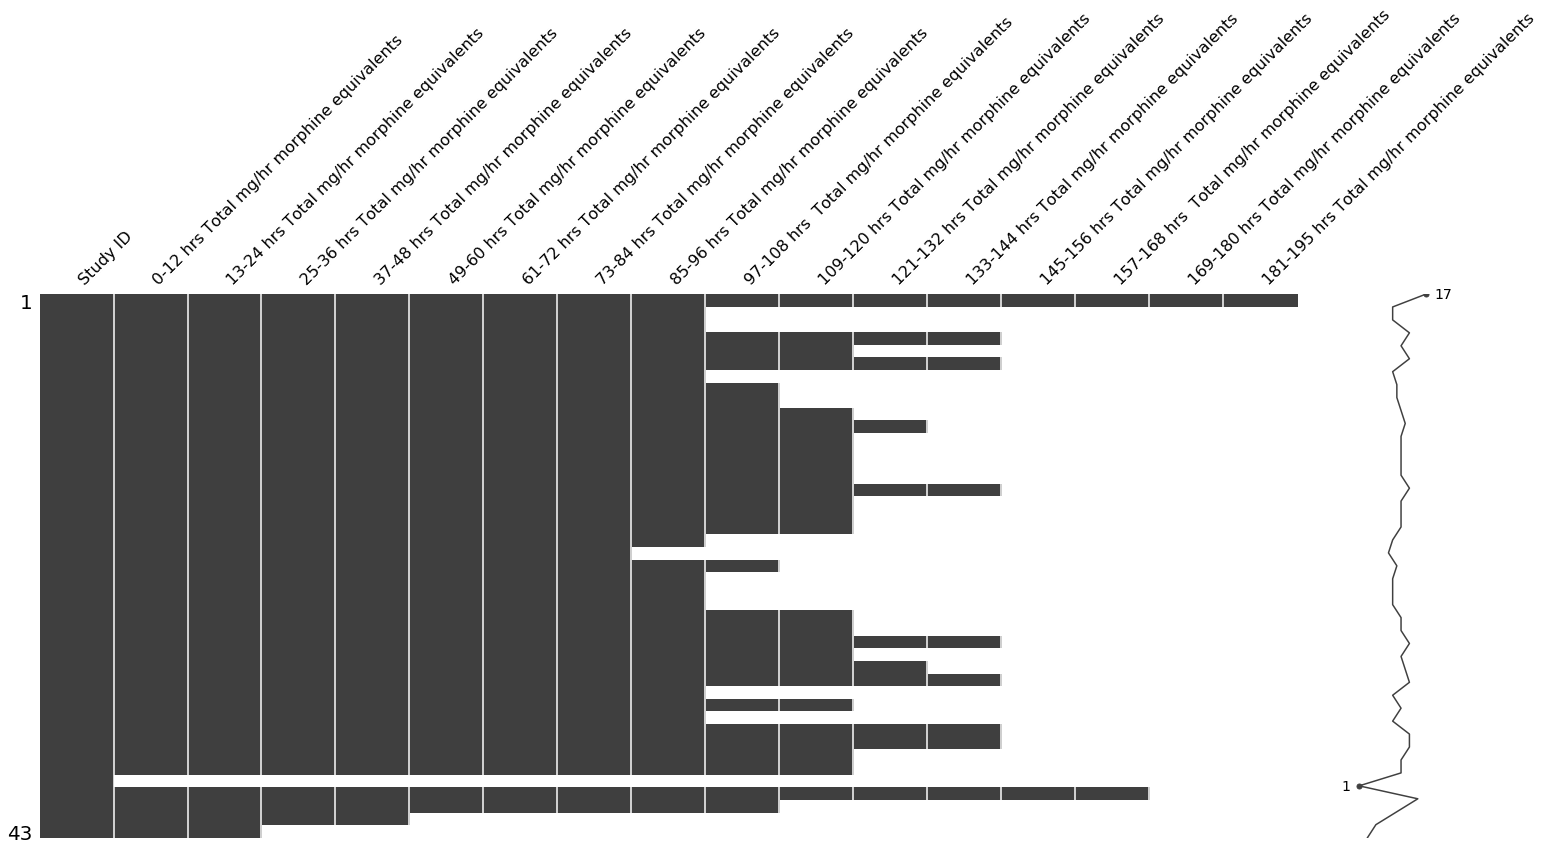

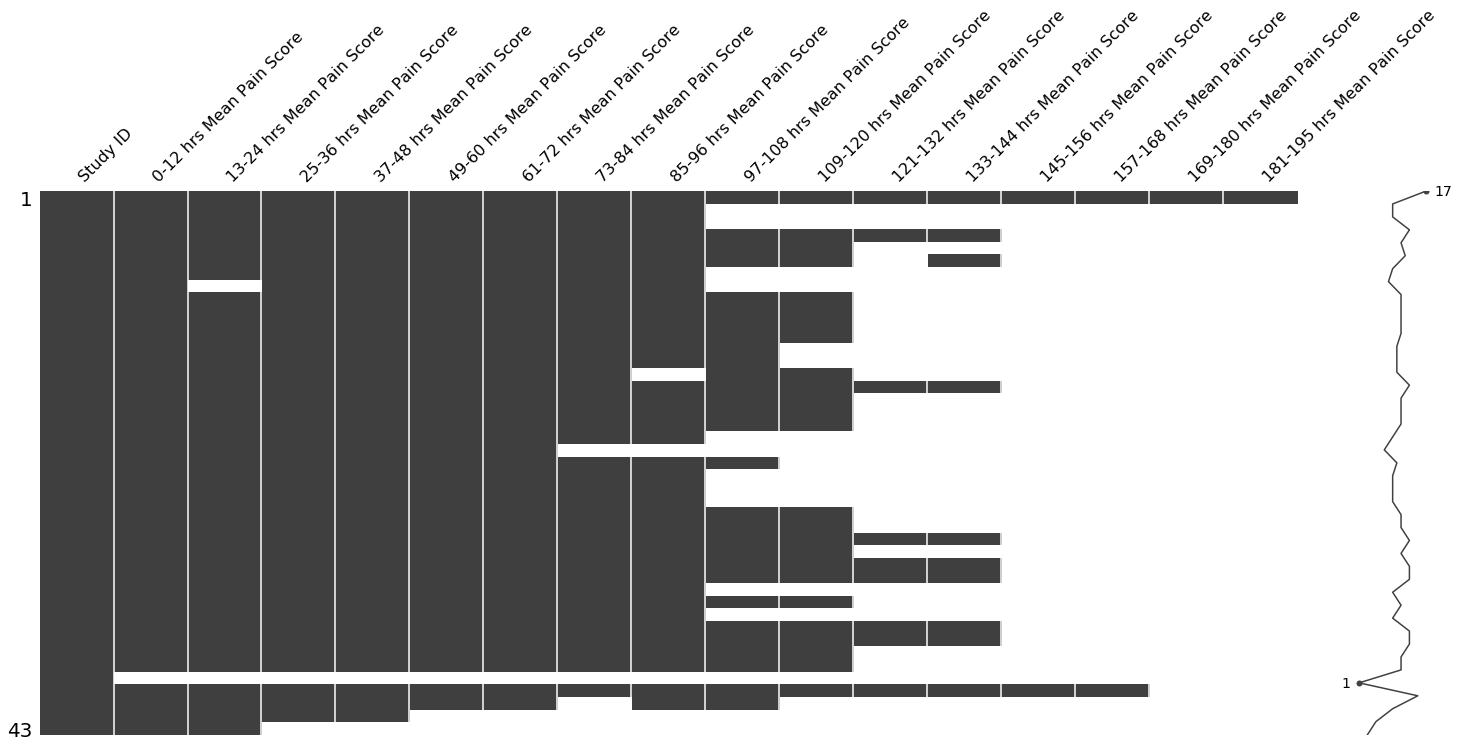

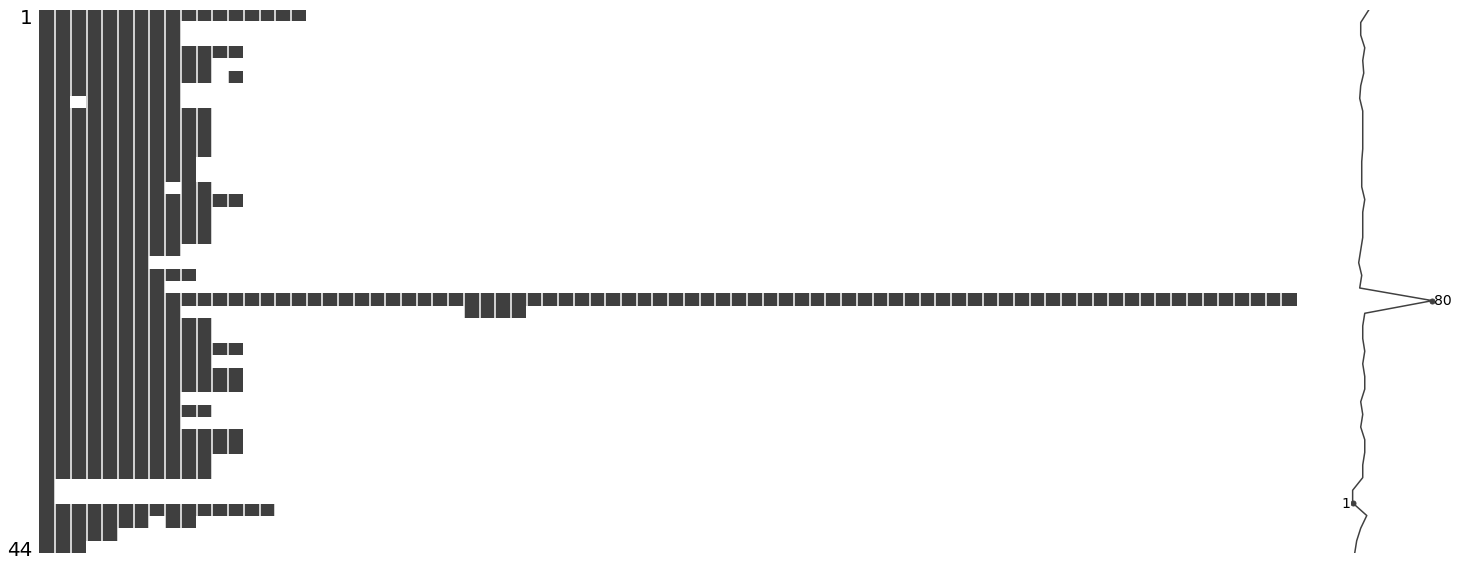

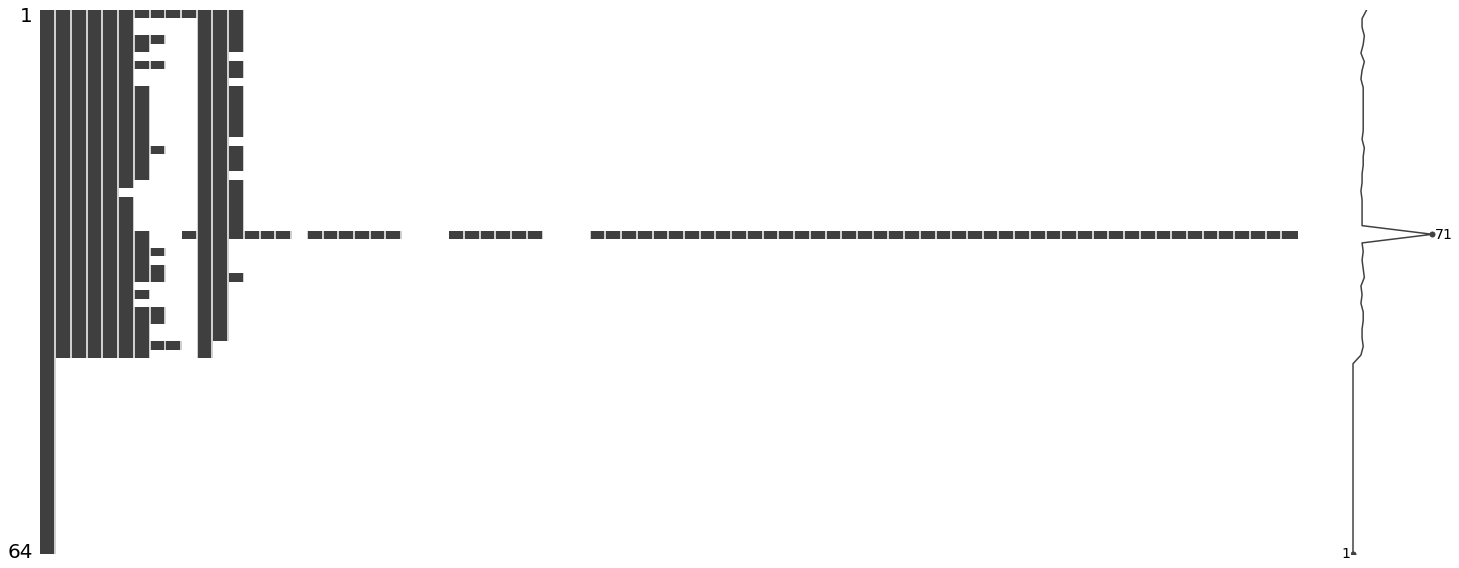

In [25]:
for df in all_df_list:
    msno.matrix(df)

In [28]:
for x in everyone_df.columns:

['PatientID',
 'GroupingInclusions (1 include, 2 exclude)',
 'Genetics (1 yes, 2=NO)',
 'PatientGender',
 'PatientAge',
 'PatientWeight',
 'PatientRace',
 'WhatSurgery (1=Nuss, 2= Spine, 3=other)',
 'Haller Index (999= not applicable)',
 'Risser',
 'Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)',
 'Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)',
 '# of levels',
 'Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)',
 'Top degree ',
 'Bottom degree',
 'SurgeryHX',
 'Surgeries',
 'DischargeDate',
 'DODPostOpDay',
 'PostOpHrs',
 'PhoneFollowUpDate',
 'PFUPostOpDay',
 'ASA',
 'Surgeon',
 'Complications (1 seen in ED for pain and emesis POD #16, 2=hemothorax at 5 months and loose footplate at 6 months ORX2, 3=nausea, vomiting and diarrhea POD #6; 4=constipation, 5=nausea post-op day 12, pain 3 and 12 months with athletic activity - rowing 6 - sudden pain 6 months out; 7= nausea, dizzy, pain 3 months ou; 8= MUSCLE SPAS

In [10]:
data_dict_xlsx = pd.ExcelFile('pain_data_dict.xls')
data_dict_everyone_df = pd.read_excel(data_dict_xlsx, 'Surgical Registry EVERYONE')
data_dict_ecap_df = pd.read_excel(data_dict_xlsx, 'Ecap')
data_dict_variables_df = pd.read_excel(data_dict_xlsx, 'Variable Values')

In [11]:
data_dict_everyone_df

,Variable Information,Unnamed: 1,Variable Information.1,Unnamed: 3,Variable Information.2,Unnamed: 5,Variable Information.3,Unnamed: 7,Variable Information.4,Unnamed: 9,...,Unnamed: 245,Variable Information.123,Unnamed: 247,Variable Information.124,Unnamed: 249,Variable Information.125,Unnamed: 251,Variable Information.126,Unnamed: 253,Variable Information.127
0,Variable,Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PatientID,Unique ID for each patient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"GroupingInclusions (1 include, 2 exclude)",Grouping Inclusions and Exclusions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Genetics (1 yes, 2=NO)",Enrolled in Genetics testings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PatientGender,Patient's Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PatientAge,Patient's Age in months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PatientWeight,Patients' weight in Kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PatientRace,Ptient's Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Nuss = chest deformation\nSpine = spinal curva...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Haller Index (999= not applicable),Index relevant to chest deformation (Nuss)\nHi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_dict_everyone_df = data_dict_everyone_df.dropna(axis = 1)
data_dict_everyone_df.columns = ['Variable', 'Label']
data_dict_everyone_df = data_dict_everyone_df.drop(data_dict_everyone_df.index[0],)

In [28]:
# Dictionary for everyone worksheet

dict_everyone = dict(zip(data_dict_everyone_df['Variable'], data_dict_everyone_df['Label']))
for key in dict_everyone:
    print (key, ':', dict_everyone[key])

PatientID : Unique ID for each patient
GroupingInclusions (1 include, 2 exclude) : Grouping Inclusions and Exclusions
Genetics (1 yes, 2=NO) : Enrolled in Genetics testings
PatientGender : Patient's Gender
PatientAge : Patient's Age in months
PatientWeight : Patients' weight in Kg
PatientRace : Ptient's Race
WhatSurgery (1=Nuss, 2= Spine, 3=other) : Nuss = chest deformation
Spine = spinal curvature (Scoliosis)
Haller Index (999= not applicable) : Index relevant to chest deformation (Nuss)
Higher index indicates a more severe deformation. 
Risser : Index relevant to spinal deformity (curvature)
Higher index indicates greater curvature
Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable) : accounting for the upper back
Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable) : accounting for the lower back
# of levels : Number of levels regarding the last two rows
Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable) : different shape

In [32]:
data_dict_ecap_df.columns = ['Variable', 'Label']
data_dict_ecap_df = data_dict_ecap_df.drop(data_dict_ecap_df.index[0])

In [31]:
# Dictionary for ecap columns

dict_ecap = dict(zip(data_dict_ecap_df['Variable'], data_dict_ecap_df['Label']))
for key in dict_ecap:
    print (key, ':', dict_ecap[key])

ECAP# : Ecap ID
AnalgesicRxOCR (Oxycontin) 1 : Analgesic prescribed - Oxycontin
AmtRx1 : Amount Prescribed1
Rxdosagefreq1 : Dosage and frequency presecribed1
AmtDisp1 : Amount dispensed1
totalpillsused1 : total number of pills used1
totalpillsshouldbeleftover1 : total number of pills that should be left over1
Amtpillsleft1 : amount of pills left over in bottle1
UnaccountedPills1 : Unaccounted Pills
AnalgesicRxOxy (Oxycdone) 2 : Analgesic prescribed2 - Oxycdone
AmtRx2 : Amount Prescribed2
Rxdosagefreq2 : Dosage and frequency presecribed2
AmtDisp2 : Amount dispensed2
totalpillsused2 : total number of pills used2
totalpillsshouldbeleftover2 : total number of pills that should be left over2
Amtpillsleft2 : amount of pills left over in bottle2
UnaccountedPills2 : Unaccounted Pills2
AnalgesicRx3Valium 3 : Analgesic prescribed3 - Valium
AmtRx3 : Amount Prescribed3
Rxdosagefreq3 : Dosage and frequency presecribed3
AmtDisp3 : Amount dispensed3
totalpillsused3 : total number of pills used3
total

day13medicine2 : nan
day13medicineamt2 : nan
day13help2 : nan
day13score1hrlater2 : nan
day13ecap3 : nan
day13time3 : nan
day13score3 : nan
day13location3 : nan
day13intervention3 : nan
day13medicine3 : nan
day13medicineamt3 : nan
day13help3 : nan
day13score1hrlater3 : nan
day14diarydate : nan
day14pillsused : nan
day14POD : nan
day14ecap1 : nan
day14time1 : nan
day14score1 : nan
day14location1 : nan
day14intervention1 : nan
day14medicine1 : nan
day14medicineamt1 : nan
day14help1 : nan
day14score1hrlater1 : nan
day14ecap2 : nan
day14time2 : nan
day14score2 : nan
day14locationday2(1= surgical site, 2=HA, 3=stomach, 4=shoulder, 5=SS, Stomach and Shoulder, 6=SS, HA and Stomach, 7=SS and Shoulder, 8=SS and stomach, 9=SS and HA, 10=SS, shoulder and HA, 11=SS, shoulders, thighs, 12=SS, shoulders, HA, 13=SS and hip, 14=SS and neck, 15=SS, shoulder, and neck, 16= HA and shoulder) : nan
day14intervention2 : nan
day14medicine2 : nan
day14medicineamt2 : nan
day14help2 : nan
day14score1hrlater2 : 

In [36]:
data_dict_variables

# data_dict_variables_df.columns = ['Variable', 'Label']
# data_dict_variables_df = data_dict_variables_df.drop(data_dict_ecap_df.index[0])

,Variable Values,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Value,NaN,Label,NaN,NaN
1,GroupingInclusions,1.0,Include,NaN,NaN
2,NaN,2.0,Exclude,NaN,NaN
3,Genetics,1.0,yes,NaN,NaN
4,NaN,2.0,no,NaN,NaN
5,WhatSurgery,1.0,Nuss,NaN,NaN
6,NaN,2.0,Spinal,NaN,NaN
7,NaN,3.0,Other,NaN,NaN
8,AnalgesicRx1,1.0,Oxycontin,4.0,Valium
9,NaN,2.0,Hydrocodone,5.0,Ibuprofen
